In [38]:
import requests
import pandas as pd

sparql_endpoint = 'https://sparql.uniprot.org/sparql'

In [52]:
protein_id = 'A4_HUMAN'

In [39]:
query = '''
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX taxon:<http://purl.uniprot.org/taxonomy/> 
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#> 
PREFIX b2v: <http://bio2vec.net/function#>
PREFIX b2vd: <http://bio2vec.net/dataset#>
PREFIX keywords:<http://purl.uniprot.org/keywords/> 

SELECT ?protein ?simprotein ?preferredGeneName ?val ?x ?y
WHERE
{{
	?protein a up:Protein . 
	?protein up:mnemonic "{protein_id}" .
    SERVICE <http://test.bio2vec.net/ds/query> {{
	  (?simprotein ?val ?x ?y) b2v:mostSimilar(b2vd:dataset_2 ?protein 10) .
    }}
    ?simprotein up:encodedBy ?gene .
    ?gene skos:prefLabel ?preferredGeneName .
}}'''.format(protein_id="A4_HUMAN")

In [40]:
r = requests.get(sparql_endpoint, params = {'format': 'json', 'query': query})
data = r.json()


In [43]:
data['results']['bindings'][2]

{'preferredGeneName': {'type': 'literal', 'value': 'Abl1'},
 'val': {'datatype': 'http://www.w3.org/2001/XMLSchema#double',
  'type': 'literal',
  'value': '0.9369618'},
 'protein': {'type': 'uri', 'value': 'http://purl.uniprot.org/uniprot/P05067'},
 'simprotein': {'type': 'uri',
  'value': 'http://purl.uniprot.org/uniprot/P00520'},
 'x': {'datatype': 'http://www.w3.org/2001/XMLSchema#double',
  'type': 'literal',
  'value': '2.577185326113727'},
 'y': {'datatype': 'http://www.w3.org/2001/XMLSchema#double',
  'type': 'literal',
  'value': '1.204715956971605'}}

In [47]:
from collections import OrderedDict

proteins = []
for item in data['results']['bindings']:
    proteins.append(OrderedDict({
        'protein': item['protein']['value'],
        'gene': item['preferredGeneName']['value'],
        'x': float(item['x']['value']),
        'y': float(item['y']['value'])},
    ))

In [48]:
proteins = pd.DataFrame(proteins)


In [49]:
proteins.head()

,protein,gene,x,y
0,http://purl.uniprot.org/uniprot/P05067,APP,2.493301,0.996111
1,http://purl.uniprot.org/uniprot/P05067,App,2.606638,1.140107
2,http://purl.uniprot.org/uniprot/P05067,Abl1,2.577185,1.204716
3,http://purl.uniprot.org/uniprot/P05067,CD34,2.076935,0.914940
4,http://purl.uniprot.org/uniprot/P05067,Fgfr1,2.450249,1.210032


In [50]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


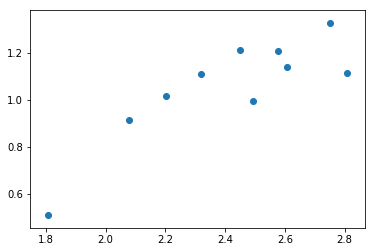

In [30]:
plt.scatter(proteins['x'],proteins['y'])

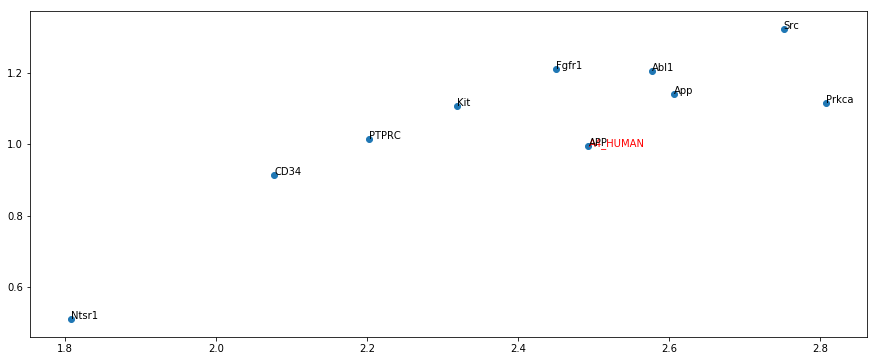

In [58]:
fig, ax = plt.subplots()
ax.scatter(proteins['x'],proteins['y'])
ax.annotate("A4_HUMAN", (proteins['x'][0], proteins['y'][0]), color='red')
for i, genename in enumerate(proteins['gene']):
    ax.annotate(genename, (proteins['x'][i], proteins['y'][i]))